In [1]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [2]:

sns.set(style="whitegrid", palette="pastel")

stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2023-01-01', end='2024-12-31')


/tmp/ipython-input-2501704365.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [3]:

print(data.head())
print(data.info())
print(data.describe())


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.211197  128.954545  122.324571  128.343764  112117500
2023-01-04  124.482040  126.747861  123.221065  125.004162   89113600
2023-01-05  123.161942  125.871071  122.905811  125.240583   80962700
2023-01-06  127.693581  128.353621  123.033882  124.137239   87754700
2023-01-09  128.215698  131.427258  127.959568  128.530950   70790800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2023-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   501 non-null    float64
 1   (High, AAPL)    501 non-null    float64
 2   (Low, AAPL)     501 non-null    float64
 3   (Open, AAPL)    501 non-null    float64
 4   (Volume, AAPL)  501 non-null    int64  
dt

In [4]:

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [7]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [8]:

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [11]:

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)**0.5
    print(f"{model_name} – MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression – MAE: 0.89, RMSE: 1.14
Random Forest – MAE: 4.06, RMSE: 7.51


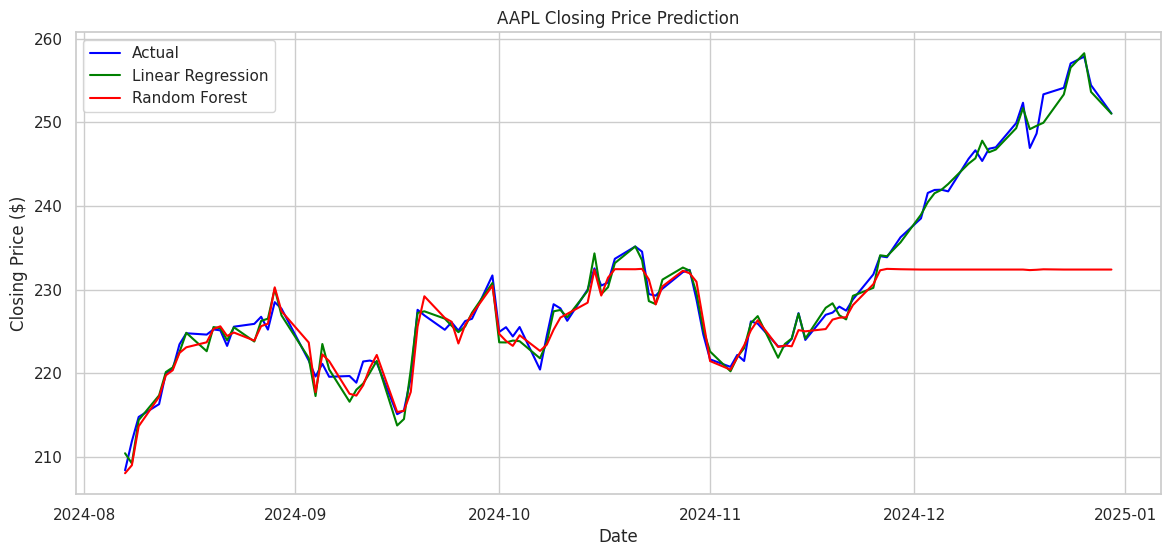

In [10]:

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression', color='green')
plt.plot(y_test.index, y_pred_rf, label='Random Forest', color='red')
plt.title(f"{stock_symbol} Closing Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()